# Chapter 08 이미지를 위한 인공 신경망
- 이미지 분류 문제에 뛰어난 성능을 발휘하는 합성곱 신경망의 개념과 구성요소에 대해 배움
- 케라스 API로 합성곱 신경망을 만들어 패션 MNIST 데이터에서 성능을 평가해 봄
- 합성곱 층의 필터와 활성화 출력을 시각화하여 합송곱 신경망이 학습한 내용을 고찰

## 8-2 합성곱 신경망을 사용한 이미지 분류
- 케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지를 분류

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


### 합성곱 신경망 만들기

In [2]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

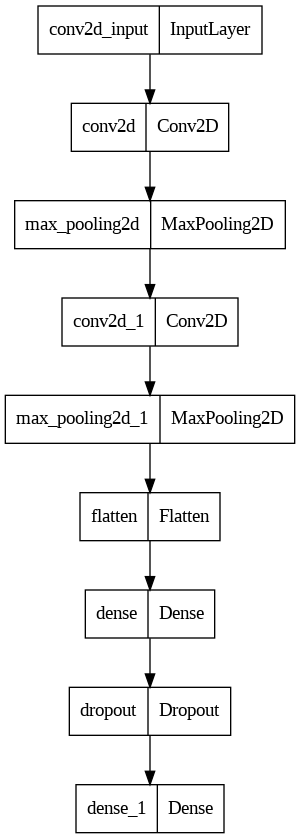

In [8]:
keras.utils.plot_model(model)

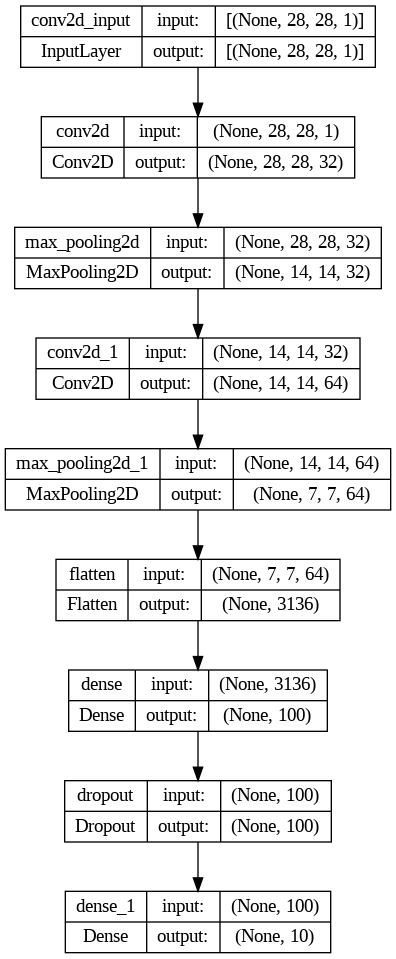

In [9]:
keras.utils.plot_model(model,show_shapes=True)

### 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.5155 - accuracy: 0.8157 - val_loss: 0.3296 - val_accuracy: 0.8791
Epoch 2/20
  32/1500 [..............................] - ETA: 4s - loss: 0.3579 - accuracy: 0.8740

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3447 - accuracy: 0.8759 - val_loss: 0.2998 - val_accuracy: 0.8907
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2987 - accuracy: 0.8929 - val_loss: 0.2564 - val_accuracy: 0.9046
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2652 - accuracy: 0.9037 - val_loss: 0.2489 - val_accuracy: 0.9071
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2393 - accuracy: 0.9118 - val_loss: 0.2426 - val_accuracy: 0.9081
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2192 - accuracy: 0.9191 - val_loss: 0.2289 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2020 - accuracy: 0.9246 - val_loss: 0.2311 - val_accuracy: 0.9147
Epoch 8/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1866 - accuracy: 0.9312 - val_loss: 0.2376 - val_accuracy: 0.9097


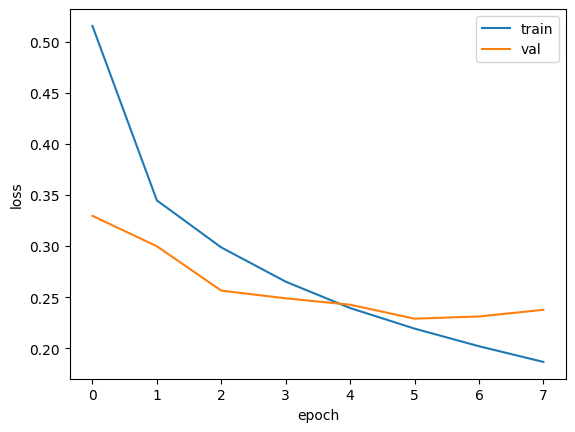

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [13]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2289 - accuracy: 0.9168


[0.22894008457660675, 0.9168333411216736]

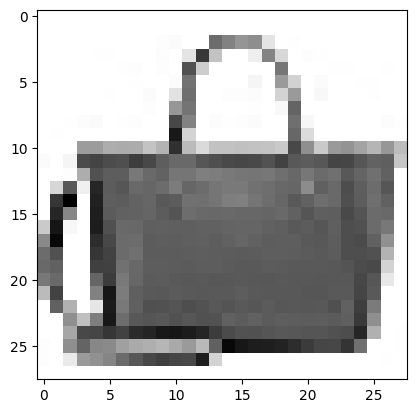

In [14]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [15]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 236ms/step
[[1.5678701e-12 1.5679393e-19 6.7308600e-17 4.9655230e-14 4.6176557e-17
  5.1311714e-15 4.0869512e-14 1.1826369e-13 1.0000000e+00 1.4946303e-14]]


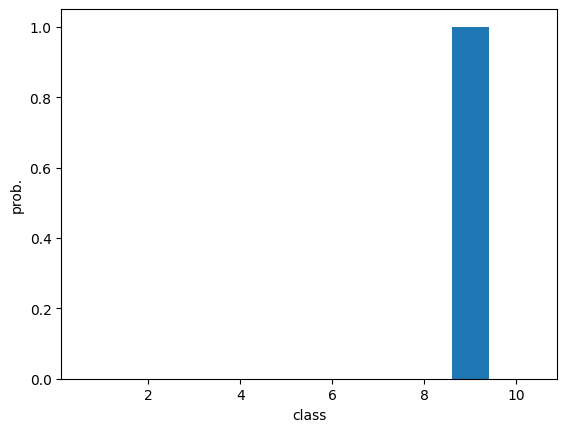

In [16]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [19]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2494 - accuracy: 0.9079


[0.2494177520275116, 0.9078999757766724]